# Name: Dhanwantari Chavan                                                                                      

# Roll no.711

## PRN no. 202201040143

# Division G

# Data set of a Fish Market

# Import Libraries

In [161]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Extracting Data

In [116]:
data=pd.read_csv("Fish dataset.csv")

In [117]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


columns of data

In [118]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [119]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [60]:
print(data.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [20]:
data.shape

(159, 7)

As we see there are 159 observations

# Data visualization

In [120]:
Species=data['Species'].value_counts()

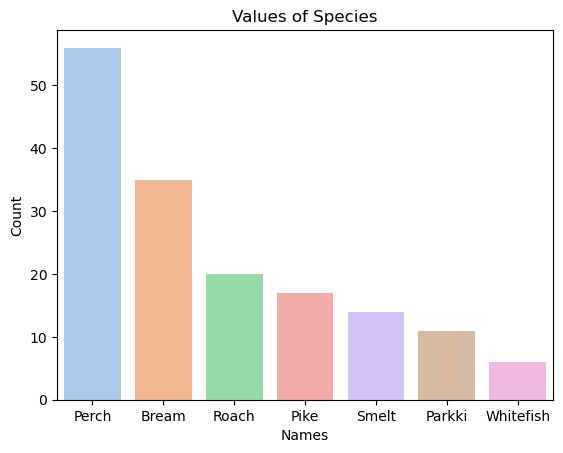

In [124]:

sns.barplot(x=Species.index, y=Species.values)
plt.title('Values of Species')
plt.xlabel('Names')
plt.ylabel('Count')
plt.show()

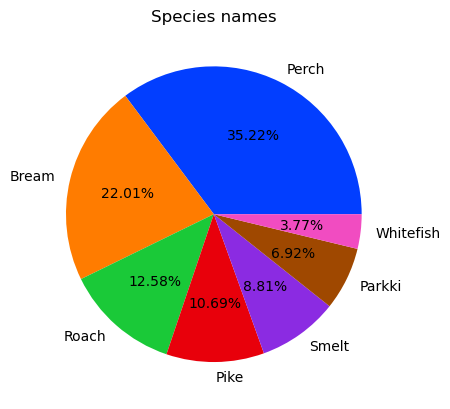

In [127]:

plt.pie(Species.values, labels=Species.index, autopct='%1.2f%%')
plt.title('Species names')
plt.show()


In [128]:
data['Weight'].unique()

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4,   19.7,   19.9])

# Correlation Analysis

In [129]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


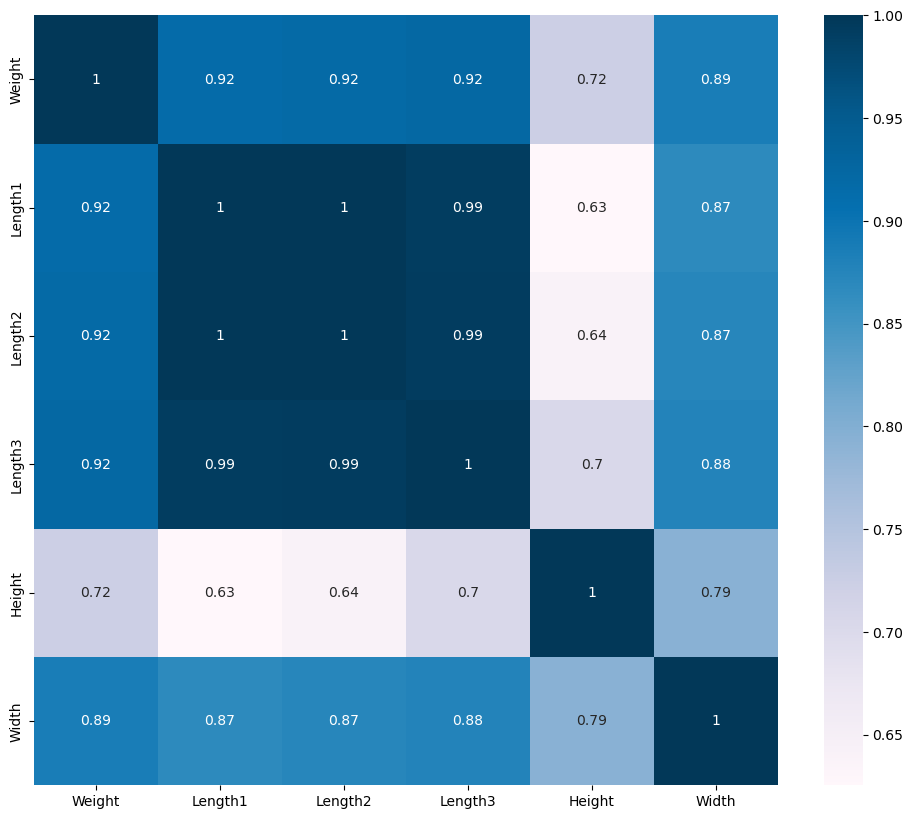

In [130]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap =plt.cm.PuBu)

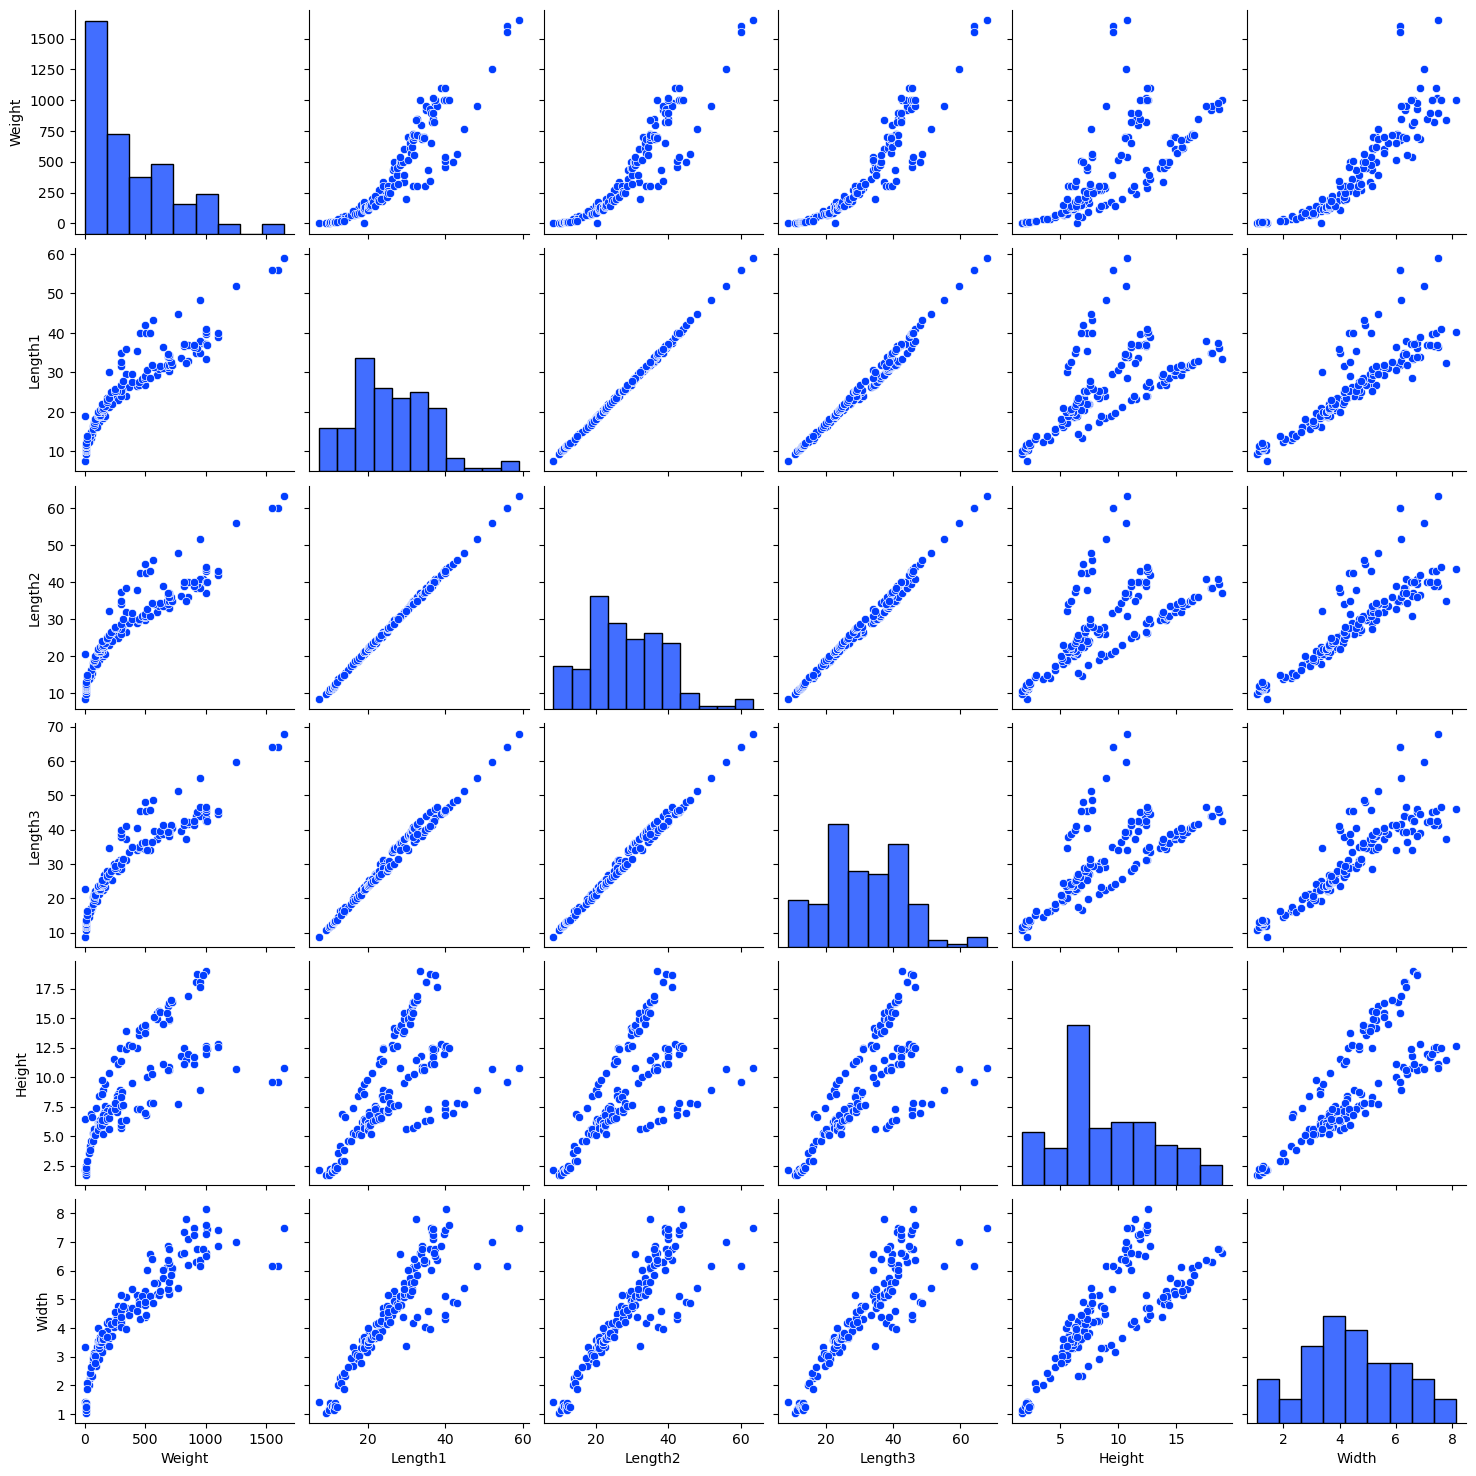

In [131]:
sns.pairplot(data, kind='scatter')
plt.show()

In [132]:
numeric_columns=data._get_numeric_data().columns

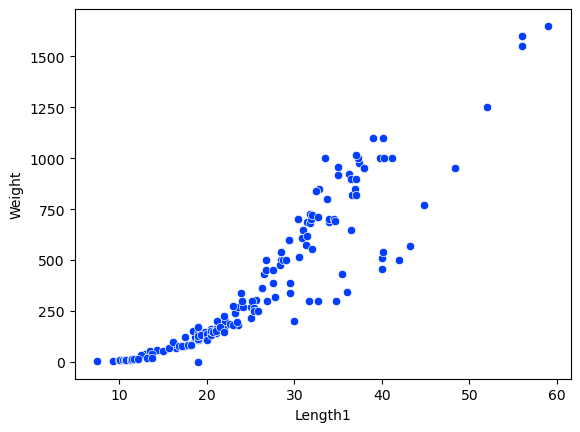

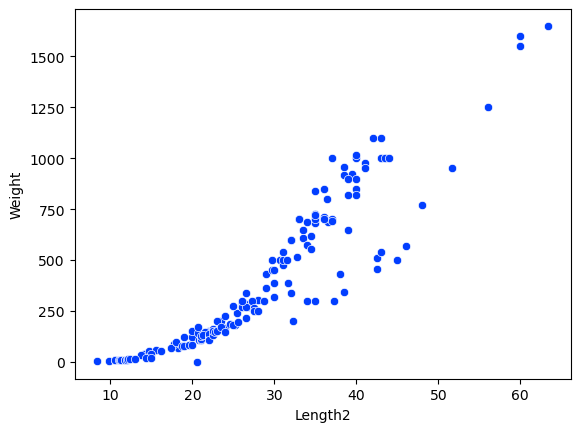

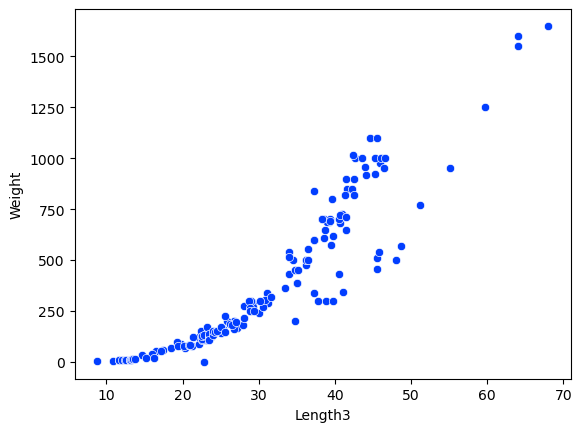

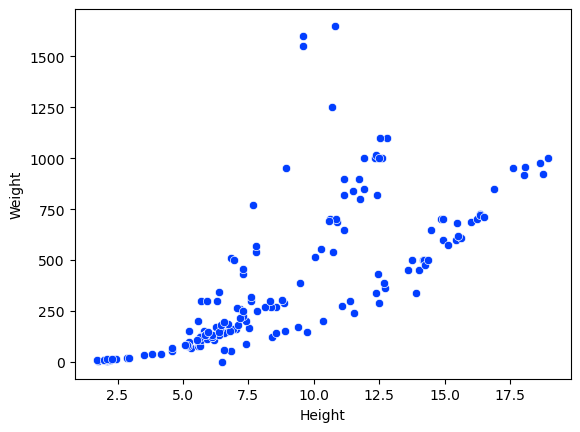

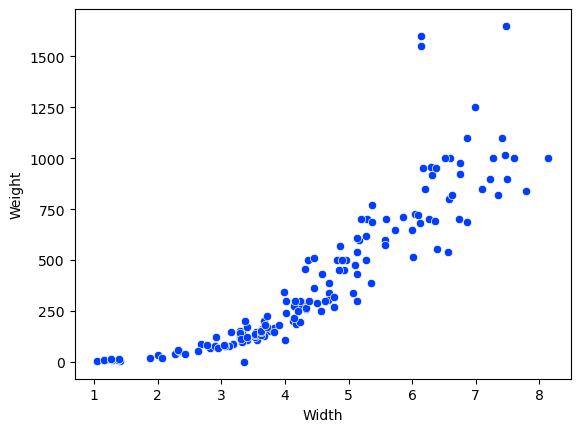

In [133]:
for col in numeric_columns:
    if col!='Weight':
      sns.scatterplot(x=col,y='Weight',data=data)
    plt.show()

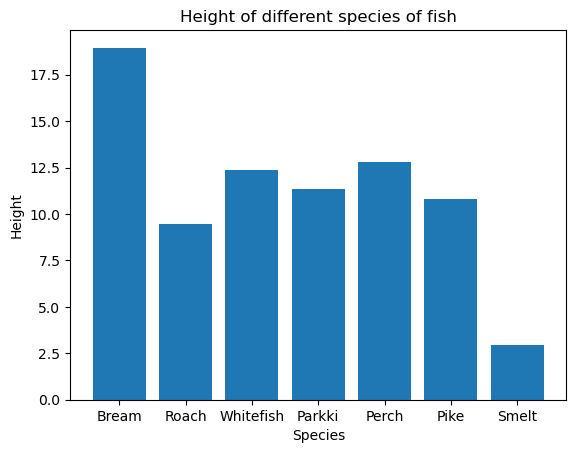

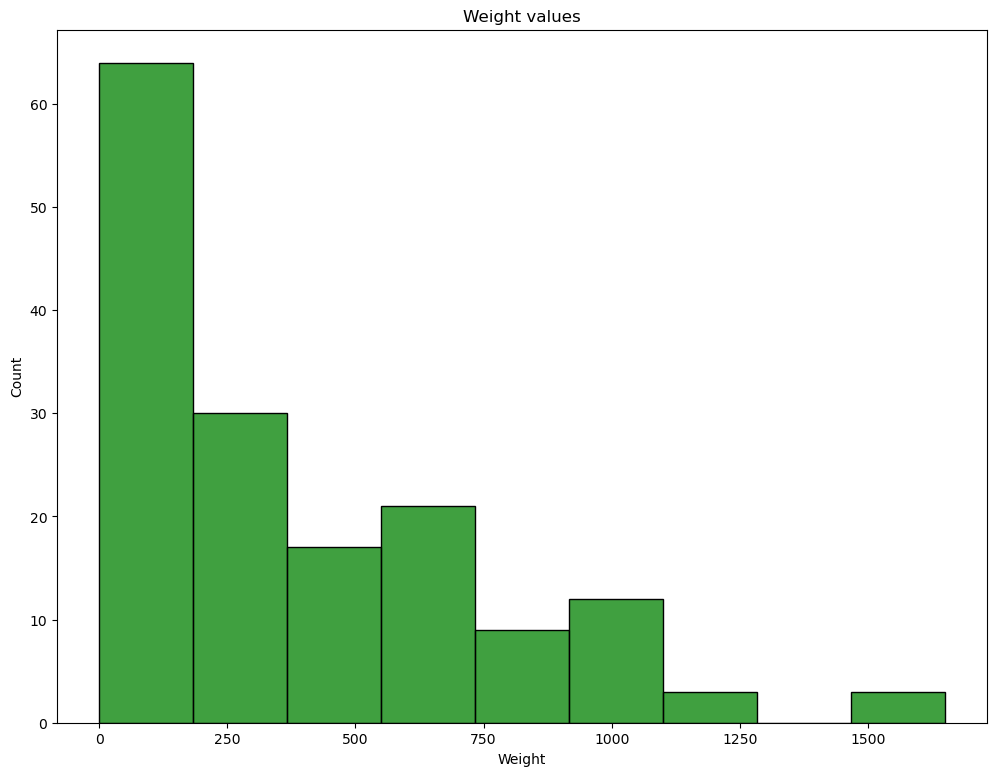

In [134]:
plt.figure(figsize=(12,9))
sns.histplot(data.Weight,color='green')
plt.title('Weight values')
plt.show()


In [137]:
print('Max length of fish:',data['Length1'].max())
print('Min length of fish:',data['Length1'].min())
print('Average length of fish:',data['Length1'].mean())

Max length of fish: 59.0
Min length of fish: 7.5
Average length of fish: 26.247169811320756


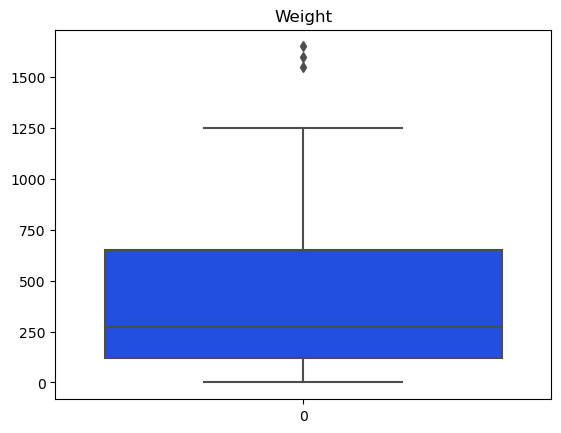

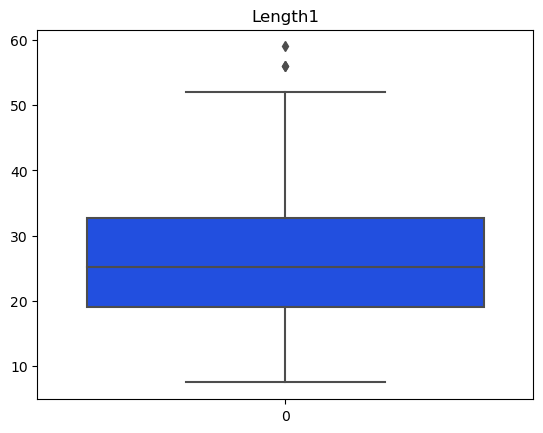

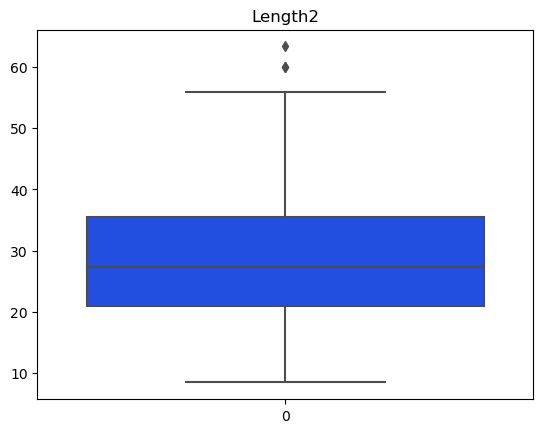

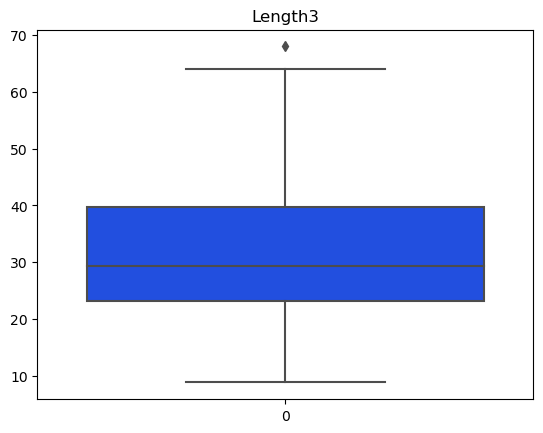

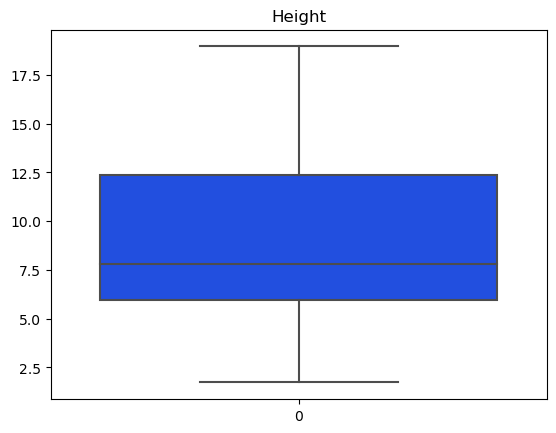

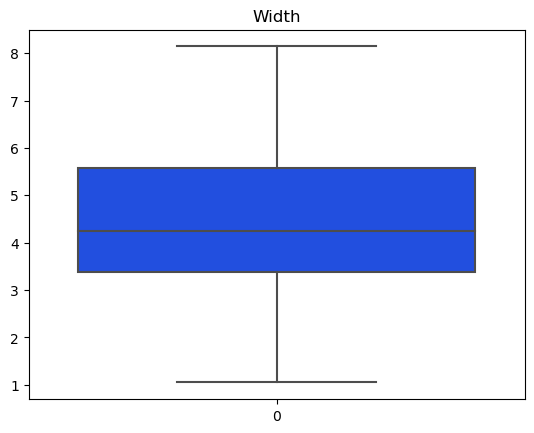

In [138]:
for col in numeric_columns:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show()

In [140]:
data.loc[142:144, :]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [141]:
data.drop([142, 143, 144], inplace=True)

As we see data shape is reduced (we deleted 3 columns)

In [142]:
data.shape

(156, 7)

We can rename columns like that

In [143]:
data.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
data.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Linear regression

In [144]:
lr= smf.ols(formula='Weight ~ LengthVer', data=data).fit()

lr.params


Intercept   -430.023483
LengthVer     31.386344
dtype: float64

In [145]:
y = data['Weight']
X = data.iloc[:,2:7]

In [113]:
a1.mean()

Length1    26.247170
Length2    28.415723
Length3    31.227044
dtype: float64

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [147]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  -415.31405865480616
Model coefficients:  [125.13612869 -53.46852609 -49.30407553  39.20563937  53.0058332 ]


In [149]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [150]:
print(f'Train error: {r2_score(y_train, y_train_pred)}')
print(f'Test error: {r2_score(y_test, y_test_pred)}')

Train error: 0.9055751050309181
Test error: 0.8867783829678582


In [151]:
cross_val_score_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print(np.mean(cross_val_score_train))

0.8625607353515636


In [152]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8867783829678582

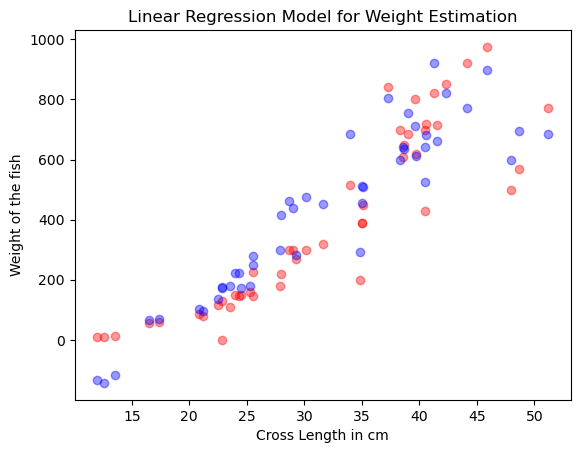

In [153]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

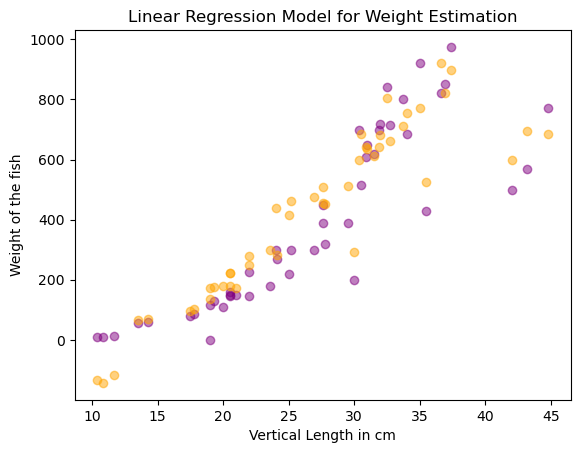

In [154]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

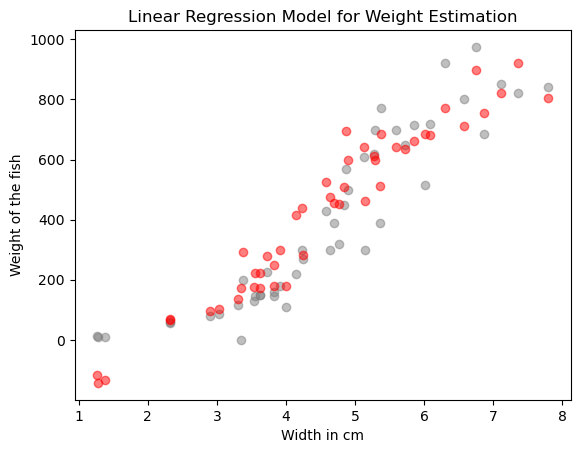

In [155]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

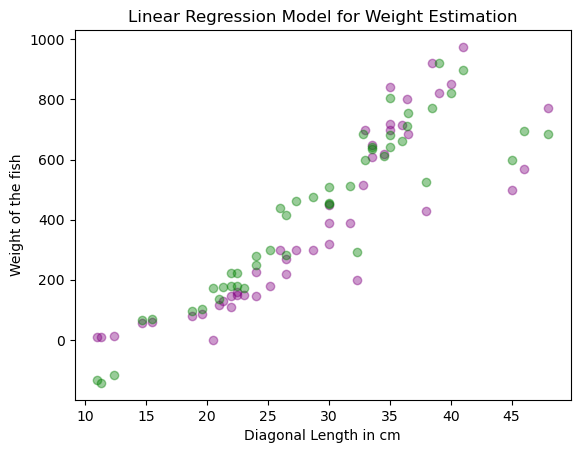

In [156]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

# Accuracy

In [157]:
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8867783829678582
